# Data Science Project - Naive Bayes Demonstration
<hr>

## 1. Project Purpose - Demo and explain naive bayes classification
This notebook was created for two reasons:

1. Primarily, to outline an example of how to create a naive bayes classification model and apply it to some data and,
- Secondarily, to introduce the underlying theory of naive bayes as supplemental information.

Naive bayes classification is based on Bayes Theorem, given by this equation:

$$ P(A|B) = \dfrac{P(B|A)P(A)}{P(B)} $$

In words, this equation states the probability of event A when you know (i.e. given) event B occured is equal to the probability of event B given that event A occured times the probability of event A divided by the probability of event B. An alternative and perhaps more intuitive way to represent the equation is to move the denominator to the other side:

$$ P(A|B)P(B) = P(B|A)P(A) $$

This equation can be understood as stating that the probability of events A and B occuring is the equal to the probability of events B and A occuring. 

The Bayes Theorem equation reworded to represent a classifier:

$$ P(Y|X) = \dfrac{P(X|Y)P(Y)}{P(X)} \tag{Base Equation}$$

Where $Y$ is our predicted or true class, i.e. the dependent variable, and $X$ is our data, i.e. the independent variable(s)

$$ X = [x_0, x_1, ...,x_n] $$

The *naive* part of the classifier is the assumption that each independent variable is also indepedent of all other indepedent variables. In other words, given a value for one independent variable, e.g.$x_0$, you have no additional information on the value of another independent variable. In equation form this could be described as:

$$P(x_i|x_j) = P(x_i) \text{ where } i\neq j$$

Given this assumption, the $\text{Base Equation}$ can be expanded into: 

$$ P(Y|X) = P(Y|x_0,...,x_n) = \dfrac{P(x_0|Y)P(x_1|Y)...P(x_n|Y)P(Y)}{P(x_0)P(x_1)...P(x_n)} $$

So, for a two class problem, the probabilities of your dependent variable being either of the two classes are:

$$ P(y_c|X)
\begin{cases}
    P(y_0|X) = \dfrac{P(X|y_0)P(y_0)}{P(X)} = P(y_0)\dfrac{P(x_0|y_0)P(x_1|y_0)...P(x_n|y_0)}{P(x_0)P(x_1)...P(x_n)} \\
    P(y_1|X) = \dfrac{P(X|y_1)P(y_1)}{P(X)} = P(y_1)\dfrac{P(x_0|y_1)P(x_1|y_1)...P(x_n|y_1)}{P(x_0)P(x_1)...P(x_n)}
  \end{cases}
  $$
  
Then, if instead of a probability you would like just to classify an instance given a set of features $X$, you take the class with the highest probability. Since the denominator is the same for all classes, you can remove it from your equation, since it is simply a factor that effects the probability of each class. Thus, you take the maximum value from using this equation to find you class:
  
$$ y = argmax_y P(y_c)P(y_c|X) = argmax_y P(y_c)\prod_{i=1}^n P(y_c|x_i) $$

Where $c$ is the class, $n$ is the number of features that each instance has and $\prod$ is the product operator (like the summation operator $\sum$), meaning multiply all values produced together.

Lastly, if you're fortunate enough to either know or you can safely assume that the probability of each of your classes is equal, such as it should be with rolling a fair die or flipping a fair coin, then you can remove the $P(y_c)$ from the equation as well. This is not always the case though.

$$ y = argmax_y P(y_c|X) \text{ assuming } P(y_c)=P(y_k) \text{ where } c \neq k$$


## 2. Data Source - Load the MNIST character dataset (download if needed first)
For this demonstration, the data needed to create a simple naive bayes classifier needs to have a large number of features (indepedent variables). While naive bayes is commonly used in natural language processing (NLP) applications, such as email spam filtering, using a image dataset provides a quicker and more easily visualized method to demo the naive bayes concept.

In [4]:
#We will use os to create our data file path
import os

#We will use scipy to load our data
from scipy.io import loadmat

file_name = 'mnist-original.mat'

#Get the full file path needed for loading the data
full_path = os.path.abspath(os.getcwd()) + '/' + file_name

#Check if the file exists, otherwise download it
# files = os.listdir(os.curdir)
# print(files)
if not os.path.exists(file_name):
    
    source_url = 'https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat'
    
    #Use urllib to download the file
    from urllib.request import urlretrieve
    
    print("Downloading %s" % file_name)
    urlretrieve(source_url, file_name)

mnist_raw = loadmat(file_name)
mnist_dataset = {
"data": mnist_raw["data"].T,
"target": mnist_raw["label"][0],
"COL_NAMES": ["label", "data"],
"DESCR": "mldata.org dataset: mnist-original",
}

import sys

#raw_byte_size = sys.getsizeof(mnist_raw)
#loaded_byte_size = sys.getsizeof(mnist_dataset)

print("Successfully loaded the data!")
print("Data instance 0 has a class of {}".format(int(mnist_dataset['target'][0])))
print("All instances have a feature vector of length: {}".format(len(mnist_dataset['data'][0])))
#print("The raw data file has a size of: {}".format(raw_byte_size))
#print("The loaded data file has a size of: {}".format(loaded_byte_size))

Successfully loaded the data!
Data instance 0 has a class of 0
All instances have a feature vector of length: 784


## 3. Data Structure and Quality - Visualize the data using 2D heatmaps
The data of this project is a set $28$ by $28$ pixel images representing a single hand written number. So, we have $10$ classes $(0,1,2,3,4,5,6,7,8,9)$, since there are $10$ differents digits. In our dataset, the features are stored as $1D$ vectors though, so they have a length of $28^2$, i.e. $784$ features. Each pixel stores a value between $0$ and $255$. Below is a visualization of a single example of each class of digit.

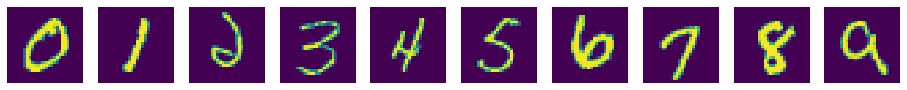

In [5]:
#Matplotlib will be used to visualize the data
import matplotlib.pyplot as plt

#Numpy will be used to manipulate the data
import numpy as np

#Fit plots to the width of browser
plt.rcParams["figure.figsize"] =(16,4) 

#Create 10 plots
ax={}
fig, ax = plt.subplots(1, 10)
for i in range(0,10):
    ax[i].matshow(np.reshape(mnist_dataset['data'][i*int(np.floor(len(mnist_dataset['data'])/11))],(28,28)))

[axi.set_axis_off() for axi in ax.ravel()]
plt.show()


## 4. Data Model - Compute the probabilities for each class in the Naive Bayes Model
Training a Naive Bayes model is more like training a linear regression than a support vector machine or neural net. I.e. Naive Bayes models rely on analytical solutions and processes to generate its model parameters, as opposed to numerical methods like gradient descent. 

Recall from above that to perform a prediction using a Naive Bayes model is to complete the following computation:

$$ \hat y = argmax_y P(y_c|X)$$

Where $\hat y$ is our predicted class ($y$) and we're making the assuming that each class (i.e. each digit) is equally likely.

Further recall that: 
$$P(y_c|X) = \prod_{i=1}^nP(y_c|x_i)$$ 

But what is $P(y_c|x_i)$? 
>$P(y_c|x_i)$ is the probability that that instance $X$ is a part of class $c$ given the feature value $x_i$. 

For our image prediction problem, a specific example would be that $P(y_0|x_0)$ is the probability that our image is a $0$ given the $0^{th}$ (aka $1^{st}$) pixel value.

If our image had just $2\times2$ pixels, the whole prediction would be :
$P(y_0|X) = P(y_0|x_0)\times P(y_0|x_1)\times P(y_0|x_2)\times P(y_0|x_3) $

So training a Naive Bayes model is simply finding either the value (i.e. the probability) or the function (i.e. probability distribution) representing $P(y_c|x_i)$.

Since pixel values are continuous, for this demonstration we need to find the probability distribution that represents $P(y_c|x_i)$.

Finding the probability distribution of that function requires three major steps. 

1. Select all the images of only class $c$. 
1. Select all the $i^{th}$ pixel values of all those images. 
1. Compute a probability distribution that represents all those $i^{th}$ pixel values.

Then, we repeat these three steps for each pixel value of that class, and then we repeat the whole process for each class.

For our data set, we have $10$ classes ($[0,1,2,3,4,5,6,7,8,9]$) and $28^2$ (i.e. $784$) features ($[x_0,x_1,...,x_{782},x_{783}]$.) So we have to repeat the process $10\times784$ times! 

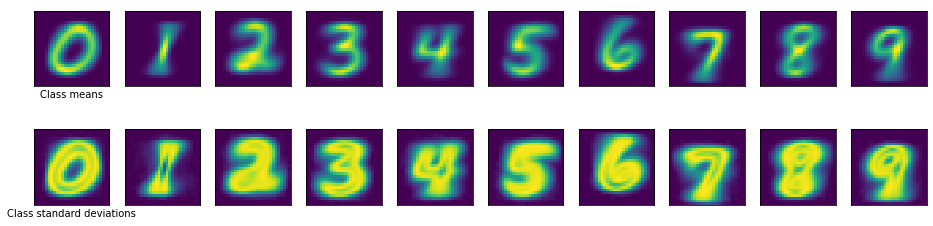

In [12]:
#Define our model dictionary
nb_model = {}

#Create a model visualization
ax={}
fig, ax = plt.subplots(2, 10)   

#Loop through the classes
for target in set(mnist_dataset['target']):

    #Select only the samples of the given class
    class_data = mnist_dataset['data'][mnist_dataset['target']==target]
    
    #Compute the mean value for each feature for the given class
    class_means = np.mean(class_data,axis=0)
    
    #Compute the standard deviation for each feature for the given class
    class_stds = np.std(class_data,axis=0)+1e-2
    
    #plt.matshow(np.reshape(class_stds,(28,28)))
    #plt.pause(1)
    
    #Store the mean and standard deviation values in an dictionary
    nb_model[target] = {'means':class_means,'stds':class_stds,'length':len(class_data)}
    
    ax[0,int(target)].matshow(np.reshape(class_means,(28,28)))
    ax[1,int(target)].matshow(np.reshape(class_stds,(28,28))) 

#Hide axis ticks and numbers
[axi.xaxis.set_ticks([]) for axi in ax.ravel()]
[axi.yaxis.set_ticks([]) for axi in ax.ravel()]

#Add labels for the two parts of our model
plt.setp(ax[0, 0], xlabel='Class means')
plt.setp(ax[1, 0], xlabel='Class standard deviations')

plt.show()

In [7]:
# Define a function to return a probability based on an input value and a mean and std
def log_probability(x,u,s):
    return -np.log(s) - ( (x-u)**2 / (2 *(s**2)) )
    #return np.exp(-(x-u)**2 / (2 * (s**2))) / (np.sqrt(2*np.pi)*s)

# Define a function to predict the hand written digit
def predict(X, model):
    
    #Create a list for saving the prediction probability for each class
    class_probs = []
    
    #loop through the classes
    for classes in range(10):

        #Create a list of the log probabilities for each pixel with respect to the current class's mean and std
        log_probs = list(map(log_probability,X,model[classes]['means'],model[classes]['stds']))
        
        #Append the sum of the log probabilities to the predictions list
        class_probs.append(sum(log_probs))
    
    #Return the index(i.e. class) of the maximum value within the predictions list
    return class_probs.index(max(class_probs)) 

predict(mnist_dataset['data'][0],nb_model)


0

## 5. Results and Insights - Overall Model Accuracy And Predictions Confusion Matrix 

Show performance results, conclusions and recommendations
The chosen model generated...

Predicting all class started at 8:28:30. Finished as late as 11 am ...



In [9]:
try:
    predictions
except NameError:
    predictions = []
    for i,X in enumerate(mnist_dataset['data']):
        predictions.append(predict(X,nb_model))
        
    from IPython.display import Audio, display

    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))



The overall model accuracy is: 57.0%


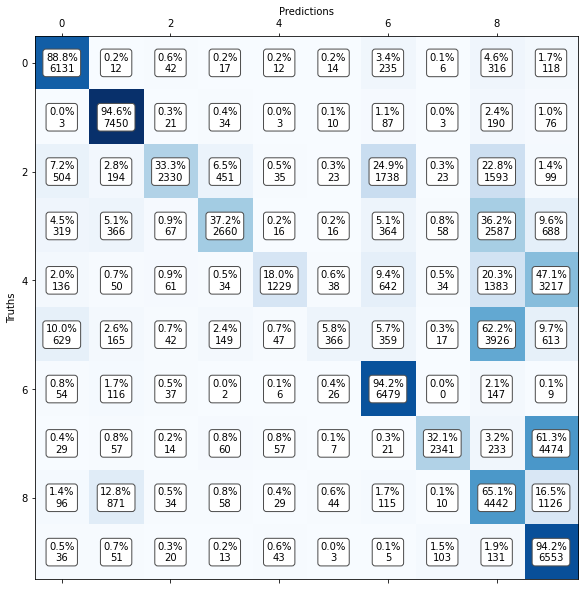

In [160]:
plt.rcParams["figure.figsize"] =(10,10) 

y_hat = predictions
y = mnist_dataset['target']
pairs = list(zip(y_hat,y))

possible_pairs = [(yy,xx) for xx in range(10) for yy in range(10)] 

matches = np.reshape([pairs.count(i) for i in possible_pairs],(10,10))

accuracy = np.sum((y_hat-y)==0)/len(y)
round(accuracy*100)

fig, ax = plt.subplots()

# Using matshow here just because it sets the ticks up nicely. imshow is faster.
# Colour maps: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
ax.matshow(matches,cmap='Blues')
counts = np.bincount(list(y))
for (i, j), z in np.ndenumerate(matches):
    ax.text(j, i, '{:0.1f}%\n{:0.0f}'.format(z*100/counts[i],z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

print("\nThe overall model accuracy is: {}%"
      .format(round(accuracy*100)))
plt.xlabel('Predictions')
ax.xaxis.set_label_position('top')
plt.ylabel('Truths')
plt.show()



## References
Loading MNIST data
https://stackoverflow.com/questions/43149272/cannot-get-mnist-database-through-anaconda-jupyter
https://lazyprogrammer.me/bayes-classifier-and-naive-bayes-tutorial-using/

Bayes Theorem and Probability Intro
https://machinelearningmastery.com/bayes-theorem-for-machine-learning/

Naive Bayes Theory Basis
https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c

Naive Bayes Pros And Cons, Applications
https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

Naive Bayes in Python from scratch
https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/
https://machinelearningmastery.com/classification-as-conditional-probability-and-the-naive-bayes-algorithm/